In [ ]:
PROJECT - PREDICTIING HEART DISEASE

In [81]:
import pandas as pd
HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")
HD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [83]:
HD.shape

(303, 14)

In [85]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [87]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [89]:
HD.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
PROBLEM STATEMENT:

You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD.drop(columns=['target'])  # Features (e.g., age, blood pressure, etc.)
y = HD['target']                # Target variable (1 if at risk, 0 if not)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
1. Data Analysis:
   a. Import the dataset
   b. Get information about the dataset (mean, max, min, quartiles etc.)
   c. Find the correlation between all fields

In [99]:

import pandas as pd
HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")
HD

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
(b).
summary = HD.describe()
print(summary)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [97]:

correlation_matrix = HD.corr()
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [ ]:
2. Data Visualization:
   a. Visualize the number of patients having a heart disease and not having
      a heart disease
   b. Visualize the age and whether a patient has disease or not
   c. Visualize correlation between all features using a heat map

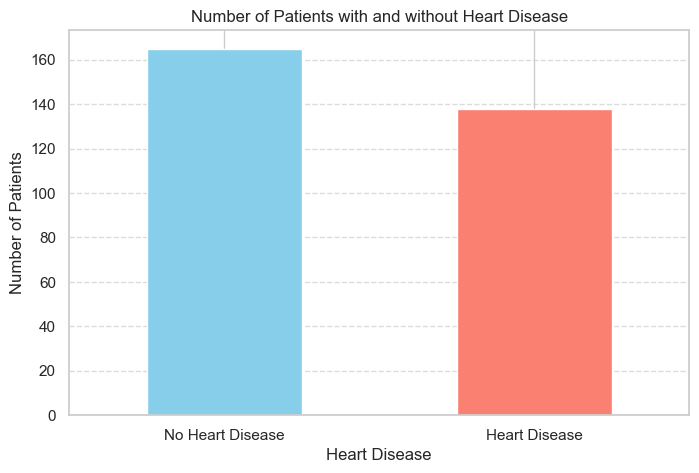

In [101]:

import matplotlib.pyplot as plt
heart_disease_counts = HD['target'].value_counts()

plt.figure(figsize=(8, 5))
heart_disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [103]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")
except FileNotFoundError:
    print("The specified file was not found.")
    HD = None
except pd.errors.EmptyDataError:
    print("The file is empty.")
    HD = None
except pd.errors.ParserError:
    print("There was an issue parsing the file.")
    HD = None

# Check if data is loaded successfully
if HD is not None:
    # Print the first few rows and columns of the DataFrame
    print(HD.head())
    print("Columns in the DataFrame:", HD.columns)
    
    # Check for the presence of the 'target' and 'age' columns
    if 'target' in HD.columns and 'age' in HD.columns:
        # Set the style for the plot
        sns.set(style="whitegrid")

        # Create a box plot to visualize age distribution by heart disease status
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='target', y='age', HD=HD, palette=['skyblue', 'salmon'])

        # Add title and labels
        plt.title('Age Distribution by Heart Disease Status')
        plt.xlabel('Heart Disease Status')
        plt.ylabel('Age')
        plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])

        # Show the plot
        plt.show()
    else:
        print("The DataFrame does not contain the required 'target' and 'age' columns.")
else:
    print("Data not loaded.")


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Columns in the DataFrame: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


ValueError: Could not interpret input 'target'

<Figure size 1000x600 with 0 Axes>

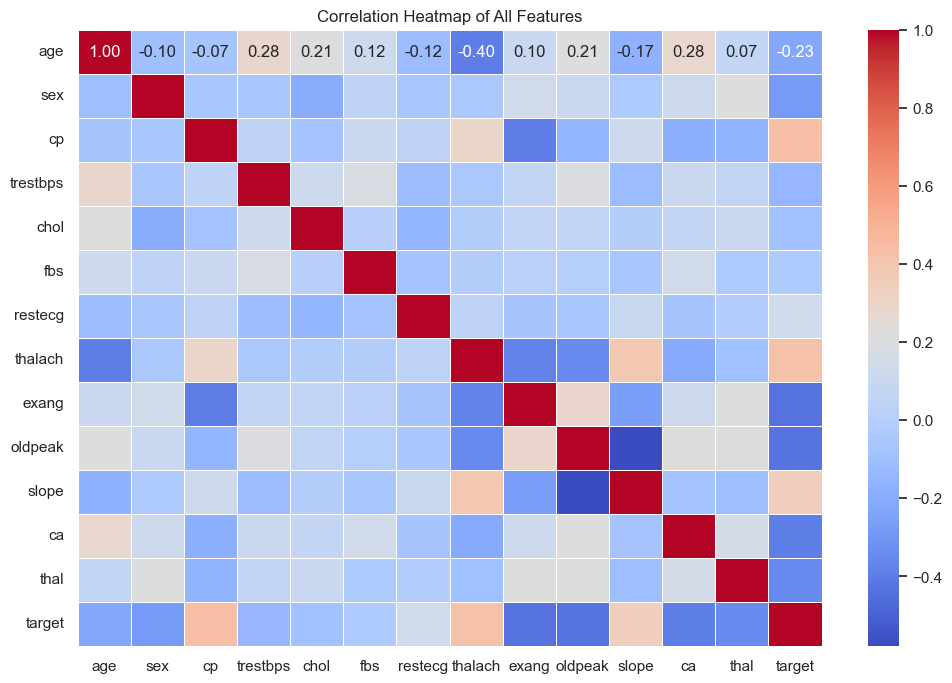

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

correlation_matrix = HD.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of All Features')

plt.show()


In [ ]:
3. Logistic Regression:
   a. Build a simple logistic regression model:
      i. Divide the dataset in 70:30 ratio
     ii. Build the model on train set and predict the values on test set
    iii. Build the confusion matrix and get the accuracy score

In [111]:
from sklearn.model_selection import train_test_split

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]  
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 212
Testing set size: 91


In [117]:
from sklearn.linear_model import LogisticRegression

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80        41
           1       0.90      0.70      0.79        50

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91



In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]  
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[37  4]
 [15 35]]
Accuracy: 0.79


In [ ]:
4. Decision Tree:
   a. Build a decision tree model:
      i. Divide the dataset in 70:30 ratio
     ii. Build the model on train set and predict the values on test set
    iii. Build the confusion matrix and calculate the accuracy
     iv. Visualize the decision tree using the Graphviz package

In [125]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']] 
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.74
Confusion Matrix:
[[31 10]
 [14 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        41
           1       0.78      0.72      0.75        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



In [123]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']] 
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.74
Confusion Matrix:
[[31 10]
 [14 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        41
           1       0.78      0.72      0.75        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



In [127]:

from sklearn.metrics import confusion_matrix, accuracy_score

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[31 10]
 [14 36]]
Accuracy: 0.74


In [129]:

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]  # example features
y = HD['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['No Disease', 'Disease'], 
                           filled=True, rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data)  
graph.render("decision_tree")
graph.view() 


ModuleNotFoundError: No module named 'graphviz'

In [131]:
import graphviz
try:
    graphviz.version()
    print("Graphviz is installed.")
except graphviz.ExecutableNotFound:
    print("Graphviz is not installed.")

Graphviz is not installed.


In [ ]:
5. Random Forest:
   a. Build a Random Forest model:
      i. Divide the dataset in 70:30 ratio
     ii. Build the model on train set and predict the values on test set
    iii. Build the confusion matrix and calculate the accuracy
     iv. Visualize the model using the Graphviz package

In [137]:

from sklearn.ensemble import RandomForestClassifier

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']] 
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Predictions:", y_pred)


Predictions: [0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1]


In [135]:

from sklearn.ensemble import RandomForestClassifier

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]
y = HD['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Predictions:", y_pred)


Predictions: [0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1]


In [141]:

from sklearn.metrics import confusion_matrix, accuracy_score

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[35  6]
 [15 35]]
Accuracy: 0.7692307692307693


In [143]:

from sklearn.tree import export_graphviz
import graphviz

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]  
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

tree = rf_model.estimators_[0]

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns, 
                           class_names=['No Disease', 'Disease'], 
                           filled=True, rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data)  
graph.render("random_forest_tree")  # Save the tree as a file (optional)
graph.view()  # View the tree directly


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
6. Select the best model
    a. Print the confusion matrix of all classifiers
    b. Print the classification report of all classifiers
    c. Calculate Recall Precision and F1 score of all the models
    d. Visualize confusion matrix using heatmaps
    e. Select the best model based on the best accuracies.

Confusion Matrix for Logistic Regression:
[[37  4]
 [15 35]]


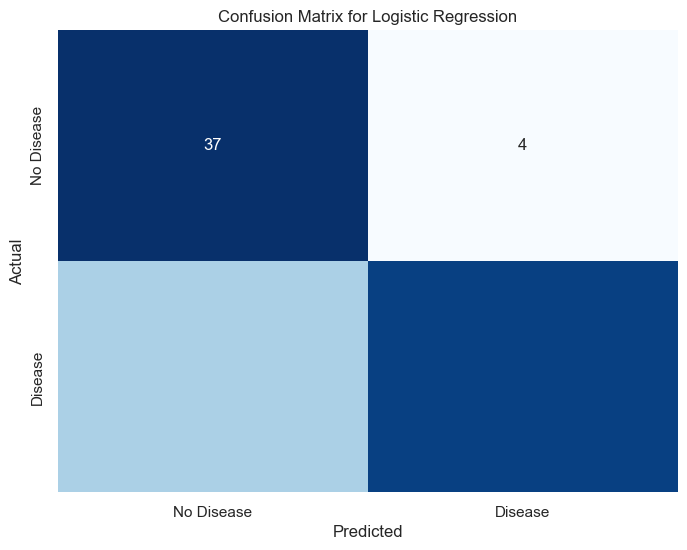

Confusion Matrix for Decision Tree:
[[30 11]
 [14 36]]


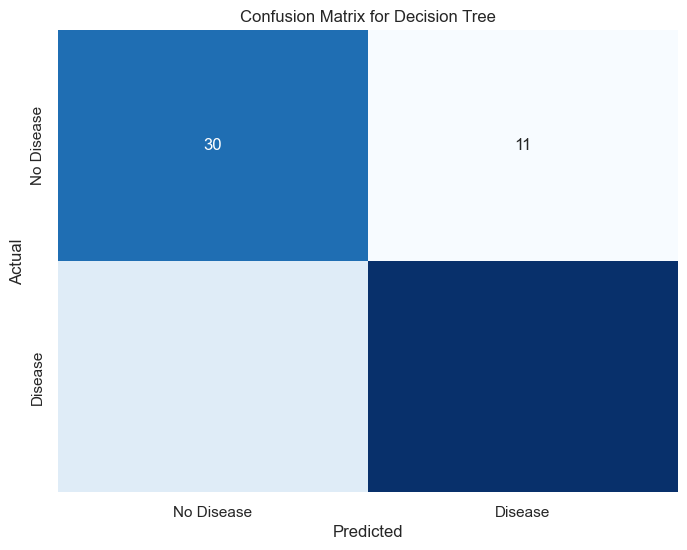

Confusion Matrix for Random Forest:
[[36  5]
 [14 36]]


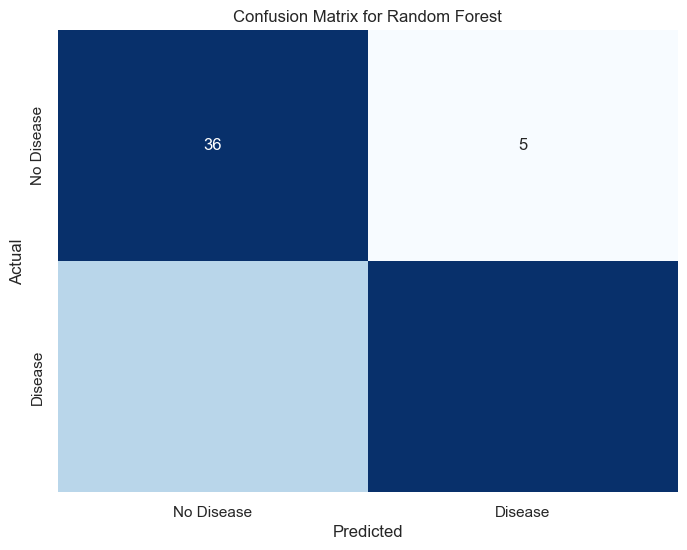

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]  
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

predictions = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[name] = y_pred


def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {name}:')
    print(cm)
    plot_confusion_matrix(cm, title=f'Confusion Matrix for {name}')


In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]  
y = HD['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

reports = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    reports[name] = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])

for name, report in reports.items():
    print(f'Classification Report for {name}:')
    print(report)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  No Disease       0.71      0.90      0.80        41
     Disease       0.90      0.70      0.79        50

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91

Classification Report for Decision Tree:
              precision    recall  f1-score   support

  No Disease       0.67      0.73      0.70        41
     Disease       0.76      0.70      0.73        50

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91

Classification Report for Random Forest:
              precision    recall  f1-score   support

  No Disease       0.73      0.90      0.80        41
     Disease       0.90      0.72      0.80        50

    accuracy                           0.80        91

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

HD = pd.read_csv(r"C:\Users\anjan\OneDrive\Desktop\Projects\dataset.csv")

X = HD[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]  
y = HD['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

metrics = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred, labels=[0,1])   
    recall = recall_score(y_test, y_pred, labels=[0,1])  
    f1 = f1_score(y_test, y_pred, labels=[0,1])  
    
    metrics[name] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

for name, scores in metrics.items():
    print(f'{name} Metrics:')
    print(f"  Precision: {scores['Precision']:.2f}")
    print(f"  Recall: {scores['Recall']:.2f}")
    print(f"  F1 Score: {scores['F1 Score']:.2f}")
    print()


Logistic Regression Metrics:
  Precision: 0.90
  Recall: 0.70
  F1 Score: 0.79

Decision Tree Metrics:
  Precision: 0.80
  Recall: 0.72
  F1 Score: 0.76

Random Forest Metrics:
  Precision: 0.88
  Recall: 0.70
  F1 Score: 0.78



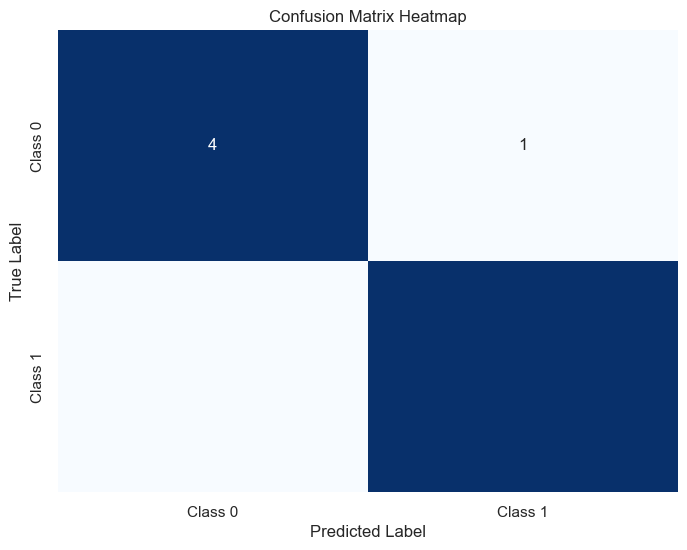

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
y_pred = [0, 0, 0, 1, 0, 1, 1, 1, 1, 0]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [159]:
from sklearn.metrics import accuracy_score

models = ['Model A', 'Model B', 'Model C']
accuracies = [0.85, 0.90, 0.88]

best_index = accuracies.index(max(accuracies))
best_model = models[best_index]
best_accuracy = accuracies[best_index]

print(f"The best model is {best_model} with an accuracy of {best_accuracy:.2f}")


The best model is Model B with an accuracy of 0.90
